# Candlestick Kicking

https://www.investopedia.com/terms/k/kickerpattern.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'T'
start = '2012-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,30.459999,30.540001,30.299999,30.379999,17.246885,33005300
2012-01-04,30.580000,30.680000,30.350000,30.430000,17.275272,37213900
2012-01-05,30.490000,30.500000,30.180000,30.400000,17.258236,34457000
2012-01-06,30.070000,30.090000,29.600000,29.680000,17.096949,45580800
2012-01-09,29.809999,29.850000,29.500000,29.660000,17.085423,26790100


## Candlestick with Kicking

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,734505.0,30.459999,30.540001,30.299999,30.379999,17.246885,33005300,False
1,734506.0,30.580000,30.680000,30.350000,30.430000,17.275272,37213900,False
2,734507.0,30.490000,30.500000,30.180000,30.400000,17.258236,34457000,False
3,734508.0,30.070000,30.090000,29.600000,29.680000,17.096949,45580800,False
4,734511.0,29.809999,29.850000,29.500000,29.660000,17.085423,26790100,False


Text(0, 0.5, 'Price')

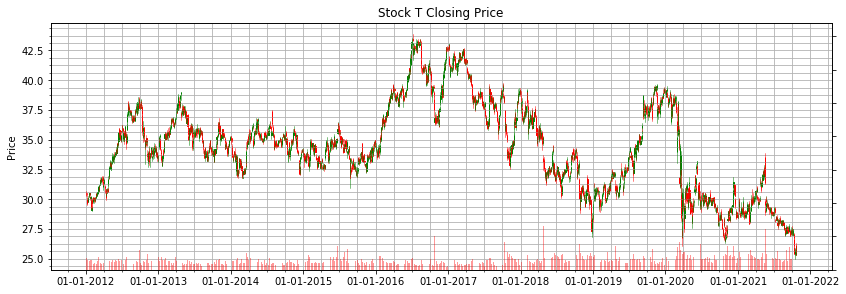

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
kicking = talib.CDLKICKING(df['Open'], df['High'], df['Low'], df['Close'])

kicking = kicking[kicking != 0]

In [6]:
df['kicking'] = talib.CDLKICKING(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['kicking'] !=0]

,Open,High,Low,Close,Adj Close,Volume,kicking
Date,,,,,,,


In [8]:
df['Adj Close'].loc[df['kicking'] !=0]

Series([], Name: Adj Close, dtype: float64)

In [9]:
df['Adj Close'].loc[df['kicking'] !=0].index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
kicking

Series([], dtype: int32)

In [11]:
kicking.index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,kicking
Date,,,,,,,
2012-01-03,30.459999,30.540001,30.299999,30.379999,17.246885,33005300,0
2012-01-04,30.580000,30.680000,30.350000,30.430000,17.275272,37213900,0
2012-01-05,30.490000,30.500000,30.180000,30.400000,17.258236,34457000,0
2012-01-06,30.070000,30.090000,29.600000,29.680000,17.096949,45580800,0
2012-01-09,29.809999,29.850000,29.500000,29.660000,17.085423,26790100,0
...,...,...,...,...,...,...,...
2021-10-15,25.690001,25.940001,25.650000,25.700001,25.700001,47615900,0
2021-10-18,25.559999,25.650000,25.280001,25.330000,25.330000,45171900,0
2021-10-19,25.459999,25.600000,25.270000,25.590000,25.590000,34926500,0


Text(0, 0.5, 'Price')

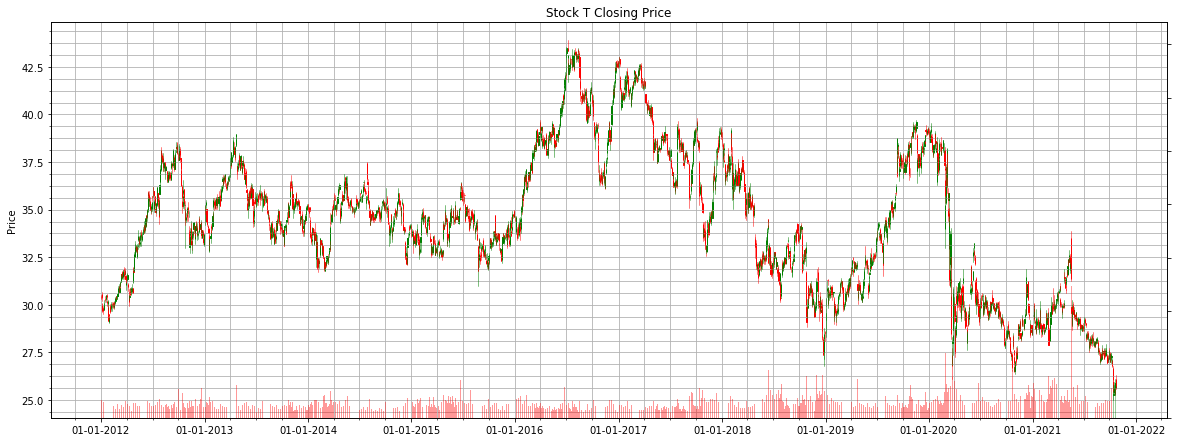

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['kicking'] !=0].index, df['Adj Close'].loc[df['kicking'] !=0],
                'pk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-09-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,kicking,VolumePositive
0,738004.0,28.240000,28.549999,28.030001,28.110001,27.574768,32542800,0,False
1,738005.0,28.080000,28.250000,27.910000,28.190001,27.653244,28687700,0,False
2,738006.0,28.040001,28.120001,27.809999,27.850000,27.319719,29441200,0,False
3,738007.0,27.870001,28.010000,27.860001,27.940001,27.408005,21025500,0,False
4,738008.0,27.910000,28.090000,27.910000,27.959999,27.427622,23070600,0,False


Text(0, 0.5, 'Price')

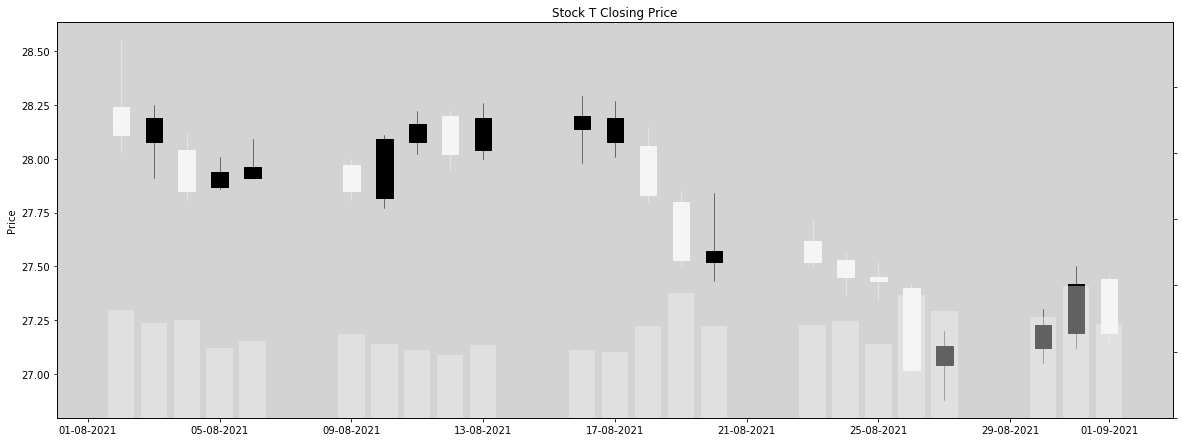

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightgrey')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='black', colordown='whitesmoke', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['kicking'] !=0].index, df['Adj Close'].loc[df['kicking'] !=0],
                'ok', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'black', False: 'whitesmoke'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

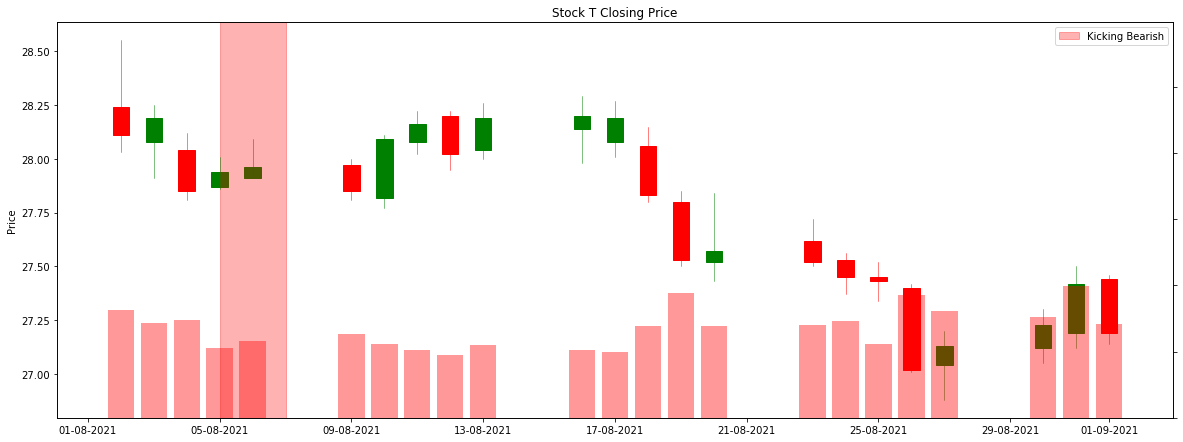

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,5)), date2num(datetime(2021,8,7)), 
           label="Kicking Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')